In [2]:




# Load the pre-trained VGG16 model
import torch
import torch.nn as nn
import os

import random
import torch
from torch.nn.modules.conv import ConvTranspose3d
import torch
import torch.nn as nn
import torch.nn.functional as F
# import torchvision
# import torchvision.transforms as transforms

import numpy as np
import gc
import os

os.system('del features_store/features_store/*.txt')
os.system('mkdir features_store')
# VGG11 architecture
class VGG11(nn.Module):
    def __init__(self):
        super(VGG11, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2) #,

            # nn.Conv2d(512, 512, kernel_size=3, padding=1),
            # nn.ReLU(inplace=True),
            # nn.Conv2d(512, 512, kernel_size=3, padding=1),
            # nn.ReLU(inplace=True),
            # nn.MaxPool2d(kernel_size=2, stride=2)
        )

    def forward(self, x):
        x = self.features(x)
        return x

# Create an instance of VGG11
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



















import cv2
#globbing utility.
import glob
import torchvision.transforms as transforms
import torch
from torch_geometric.data import DataLoader

#edge_index =  torch.LongTensor([uList,vList])

def dataProcess(filename,img_type,i):
    
    
    mainList_train = []
    path = filename+'/'+str(i)+"/"+'*.'+img_type
    print(path)
    path = glob.glob(path)

    print(path)

    for file in path:
      
    # Read the image
        image = cv2.imread(file)
        #image = image.reshape(3,1024,1024)
        image=cv2.resize(image, (28, 28))
        image = image.reshape(3,28,28)
      
        # Convert BGR image to RGB image
        
        
        mainList_train.append((torch.tensor(image),i))
        
    return mainList_train
        
   

       

        

for folder_no in range(3):

    colored_train = dataProcess('train',"jpg",folder_no)

    colored_test = dataProcess('test',"jpg",folder_no)


    #print(mainList_train)

    train_loader = DataLoader(colored_train+colored_test, batch_size=64, shuffle=True)


    #normal_data = dataProcess('/content/trainingSample',"jpg")
        
    lenet5_features = VGG11().to(device)

    outputs = []
    labels = []







    for images, lbl in train_loader:
        # Move the images to the appropriate device

        images = images.squeeze(1)
        # Pass the images through the model
        images = images.float()
        #print(images.shape)
        images=images.to(device)
        
        output = lenet5_features(images)
        

        labels.append(lbl)

        
        # Append the outputs to the list
        outputs.append(output)
        # print('ago')
        # print(torch.cuda.mem_get_info())
        del output,lbl,images
        gc.collect()
        torch.cuda.empty_cache()
        # print('after')
        # print(torch.cuda.mem_get_info())
        
        os.system("set CUDA_VISIBLE_DEVICES=''")
                

    # Concatenate the outputs along the batch dimension
    print(outputs)
    outputs_torch = torch.cat(outputs, dim=0)
    labels_torch = torch.cat(labels, dim=0)

    print(outputs_torch.shape)
    print(labels_torch.shape)





    outputs_cpu = outputs_torch.to('cpu')
    features = outputs_cpu.detach().numpy()
    features =features.reshape(outputs_torch.shape[0],-1)

    print(features.shape)


    np.savetxt('features_store/'+str(folder_no)+'.txt', features)
        
 

VGG11(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

c:\Users\Kaustav1\AppData\Local\Programs\Python\Python310\lib\site-packages\torch_geometric\deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


[tensor([[[[0.0000]],

         [[0.0000]],

         [[0.1025]],

         ...,

         [[2.4574]],

         [[1.0191]],

         [[2.1526]]],


        [[[0.0000]],

         [[0.0000]],

         [[0.1276]],

         ...,

         [[2.5062]],

         [[0.9677]],

         [[2.1940]]],


        [[[0.0000]],

         [[0.0000]],

         [[0.0828]],

         ...,

         [[2.2740]],

         [[1.0418]],

         [[2.0209]]],


        ...,


        [[[0.0000]],

         [[0.0000]],

         [[0.2035]],

         ...,

         [[2.5467]],

         [[1.0475]],

         [[2.0886]]],


        [[[0.0000]],

         [[0.0000]],

         [[0.2328]],

         ...,

         [[2.1701]],

         [[0.8888]],

         [[2.0542]]],


        [[[0.0000]],

         [[0.0000]],

         [[0.3285]],

         ...,

         [[2.4699]],

         [[0.9363]],

         [[2.1582]]]], device='cuda:0',
       grad_fn=<MaxPool2DWithIndicesBackward0>), tensor([[[[0.0000]],

   

torch.Size([64, 3, 28, 28])
torch.Size([64, 3, 28, 28])
torch.Size([64, 3, 28, 28])
torch.Size([64, 3, 28, 28])
torch.Size([7, 3, 28, 28])
[tensor([[[[0.0000]],

         [[2.4138]],

         [[3.2752]],

         ...,

         [[0.7592]],

         [[0.0000]],

         [[2.1583]]],


        [[[0.0000]],

         [[2.4873]],

         [[3.2712]],

         ...,

         [[0.6636]],

         [[0.0000]],

         [[1.9168]]],


        [[[0.0000]],

         [[2.1329]],

         [[3.5576]],

         ...,

         [[1.0638]],

         [[0.0000]],

         [[2.2503]]],


        ...,


        [[[0.0000]],

         [[2.3392]],

         [[2.9596]],

         ...,

         [[0.7493]],

         [[0.0000]],

         [[1.5942]]],


        [[[0.0000]],

         [[2.3652]],

         [[3.1902]],

         ...,

         [[0.9972]],

         [[0.0000]],

         [[1.8937]]],


        [[[0.0000]],

         [[2.4737]],

         [[3.4187]],

         ...,

         [[0.5659]]

In [30]:
print(mainList_train)


print(colored_train+colored_test)

[(tensor([[[189, 174, 195,  ..., 144, 190, 180],
         [148, 189, 179,  ..., 203, 177, 151],
         [210, 163, 133,  ..., 202, 183, 227],
         ...,
         [106, 162, 199,  ..., 203, 163, 137],
         [170, 174, 143,  ..., 154, 132, 203],
         [159, 124, 215,  ..., 169, 217, 171]],

        [[134, 201, 185,  ..., 220, 156, 134],
         [160, 163, 140,  ..., 144, 109, 152],
         [152, 120, 196,  ..., 130, 198, 128],
         ...,
         [218, 192, 166,  ..., 234, 210, 240],
         [147, 113, 161,  ..., 174, 192, 243],
         [212, 243, 236,  ..., 174, 197, 166]],

        [[205, 234, 216,  ..., 203, 180, 209],
         [ 98,  50, 109,  ..., 149, 193, 142],
         [108, 149, 159,  ..., 195, 201, 180],
         ...,
         [182, 150, 204,  ..., 168, 237,  85],
         [ 69, 178, 164,  ..., 178, 211, 187],
         [222, 185, 165,  ..., 234, 210, 244]]], dtype=torch.uint8), 2), (tensor([[[252, 237, 250,  ..., 154, 210, 168],
         [133, 207, 188,  ..., 1

TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'

c:\Users\Kaustav1\AppData\Local\Programs\Python\Python310\lib\site-packages\torch_geometric\deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


VGG11(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

In [50]:
from sklearn.metrics import confusion_matrix

def conf(yTrue,yPred):
  tp,tn,fp,fn = 0,0,0,0
  for i in range(len(yTrue)):
    if yTrue[i] == yPred[i] and yTrue[i] == 0:
      tn= tn+1

    elif yTrue[i] == yPred[i] and yTrue[i] == 1:
      tp = tp+1
    elif yTrue[i] == 0 and yPred[i] == 1:
      fp=fp+1
    else:
      fn=fn+1


  return np.array([[tp,fp],[fn,tn]])





def test1(loader):
     model.eval()

     correct = 0
     cf = np.array([[0,0],[0,0]])
     for data in loader:  # Iterate in batches over the training/test dataset.
         out = model(data.x, data.edge_index, data.batch)
         pred = out.argmax(dim=1)  # Use the class with highest probability.
         correct +=(data.y).sum()  # Check against ground-truth labels.
         c=conf(np.array(data.y),np.array(pred))
         #print(c)

         cf = cf+c
     print(correct)


     return cf  # Derive ratio of correct predictions.

print('isafhksfh')
cf = test1(test_loader)


cf = cf.T
print(cf)
print((cf[0][0]+cf[1][1])/(cf[0][0]+cf[0][1]+cf[1][0]+cf[1][1]))

isafhksfh


NameError: name 'test_loader' is not defined

In [51]:
cf = [[17763  ,   9],
 [  257 , 6621]]

tp = cf[0][0]
tn = cf[1][1]
fp =cf[0][1]
fn = cf[1][0]

pr = tp/(tp+fp)
re = tp/(tp+fn)
print(pr)
print(re)
print(2*pr*re/(pr+re))

0.99949358541526
0.9857380688124306
0.9925681716584712


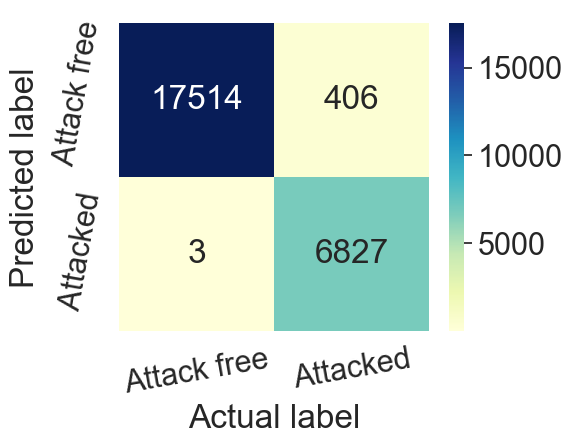

In [52]:
#Getting the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd
from pylab import savefig
import matplotlib.pyplot as plt
%matplotlib inline


cf = [[17514  ,   406],
 [  3 , 6827]]
plt.rcParams['font.size'] = 4
plt.rcParams['figure.figsize'] = (5,4)

cm_matrix = pd.DataFrame(data=cf, columns=['Attack free', 'Attacked'],
                                 index=['   Attack free ', ' Attacked'])
sns.set(font_scale=2)
sns.heatmap(cm_matrix, annot=True, fmt= 'd', cmap='YlGnBu')
# plt.title("Confusion Matrix for All attack")
plt.xlabel("Actual label")
plt.ylabel("Predicted label")
plt.yticks(rotation = 80)
plt.xticks(rotation = 10)

plt.savefig('confusion_mixed_all.pdf', bbox_inches = "tight")
# plt.savefig('confusion_.PNG', bbox_inches = "tight")
# plt.savefig('confusion_.svg', bbox_inches = "tight")

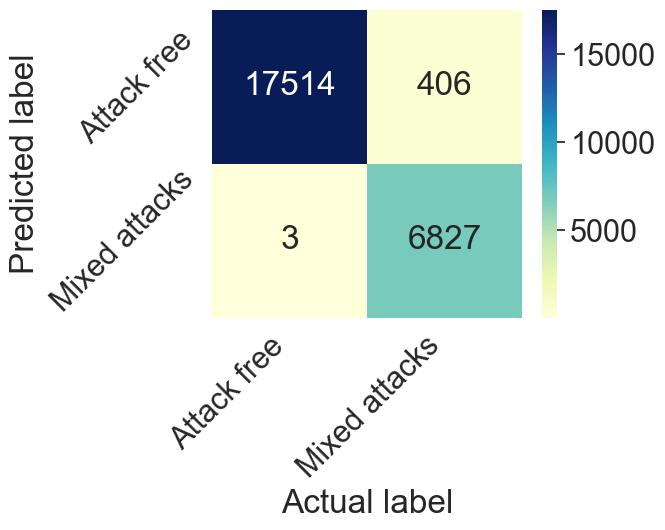

In [53]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np



cm = cf


cm_matrix = pd.DataFrame(data=cm, columns=["Attack free","Mixed attacks"],
                                 index=["Attack free","Mixed attacks"])
sns.set(font_scale=2.0)
sns.heatmap(cm_matrix, annot=True, fmt= 'g', cmap='YlGnBu')
plt.rcParams['font.size'] = 3
plt.rcParams['figure.figsize'] = (3, 3)
# plt.title("Confusion Matrix for All attack")
plt.xlabel("Actual label")
plt.ylabel("Predicted label")
plt.yticks(rotation = 45)
plt.xticks(rotation = 45, ha = 'right')

plt.savefig('confusion_mixed__.png', bbox_inches = "tight")
# plt.savefig('confusion_mixed.svg', bbox_inches = "tight")
# plt.savefig('confusion_mixed.png', bbox_inches = "tight")

In [54]:
# cm = [[1612 ,  10],
#  [   5  ,793]]


tp = cm[0][0]
tn = cm[1][1]
fp = cm[0][1]
fn = cm[1][0]

re = tp/(tp+fn)
pr = tp/(tp+fp)
f1 = 2*pr*re/(pr+re)
fpr = fp / (fp+tn)
print("pr.........."+str(pr))
print("re----"+str(re))

print("f1===="+str(f1))
print("fpr====="+ str(fpr))
print((tp+tn)/(tp+tn+fp+fn))

pr..........0.97734375
re----0.9998287377975681
f1====0.988458390947315
fpr=====0.056131618968616064
0.9834747474747475


In [55]:
import torch
import numpy as np
from torch_geometric.nn import GCNConv
from sklearn.feature_extraction.image import grid_to_graph

# Create a dummy 28x28 RGB image
image = np.random.rand(28, 28, 3)

# Reshape the image to have one row per pixel, and three columns for RGB
pixels = image.reshape(-1, 3)

# Create a graph where each node corresponds to a pixel
# and each pixel is connected with its 4 neighboring pixels
graph = grid_to_graph(*image.shape[:2])

# Create an edge_index tensor (PyG uses COO format for edges representation)
edge_index = torch.tensor(np.vstack(graph.edges()).T, dtype=torch.long)

# Create a node feature matrix, using RGB values as features
x = torch.tensor(pixels, dtype=torch.float)

# Define a GCN layer: input features = 3 (R, G, B values for each pixel),
# output features = 16 (for example)
conv = GCNConv(3, 16)

# Apply the GCN layer
x = conv(x, edge_index)

# Now x contains the output node embeddings after applying the GCN layer
print(x)


AttributeError: edges not found

In [ ]:
cm =[ [[170760 ,  1929],
 [179 , 69073]],

 [[84065   , 22],
 [ 1115, 35769]],

[[8424 ,  31],
 [  14, 3628]],

 [[4197 ,  20],
 [  20 ,1812]],

 [[1612  , 10],
 [   5  ,793]],

[[743 ,  7],
 [  3 ,457]],


 [[ 67 ,  0],
 [  0 ,175]],

 [[33,  0],
 [ 0, 88]]
]

for i in range(len(cm)):

  tp = cm[i][0][0]
  tn = cm[i][1][1]
  fp = cm[i][0][1]
  fn = cm[i][1][0]

  re = tp/(tp+fn)
  pr = tp/(tp+fp)
  f1 = 2*pr*re/(pr+re)
  fpr = fp / (fp+tn)


  mcc = (tp*tn-fp*fn)/((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))**.5

  fdr = fp/(fp+tp)

  # print("pr.........."+str(pr))
  # print("re----"+str(re))

  # print("f1===="+str(f1))
  # print("fpr====="+ str(fpr))
  print("mcccccc--------->" +str(mcc))
  #print("fdr======="+str(fdr))
  # print((tp+tn)/(tp+tn+fp+fn))

In [ ]:
import pandas as pd

square_node_data = pd.DataFrame(
    {"x": [1, 2, 3, 4], "y": [-0.2, 0.3, 0.0, -0.5]}, index=["a", "b", "c", "d"]
)
square_node_data